## KÜTÜPHANELER

In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [2]:
place_name = "Erciyes Universitesi,Kayseri,Türkiye"

In [3]:
area = ox.geocode_to_gdf("Erciyes Universitesi,Kayseri,Türkiye")

In [4]:
area.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((35.51532 38.70391, 35.51671 38.70319...",38.719179,38.696428,35.5517,35.515318,171881182,way,254566790,38.707391,35.533757,"Erciyes University, Özyurt 1.Sokağı, Köşk Maha...",amenity,university,0.601205


## Erciyes Universitesi

<Axes: >

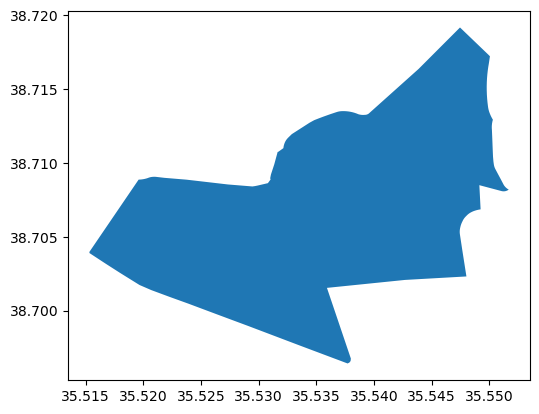

In [5]:
area.plot()

In [6]:
# CRS
area.crs = "EPSG:4326"

# CRS'yi projeksiyonlu bir CRS'ye dönüştürme
area_proj = area.to_crs("EPSG:3857")

# Alan hesaplamasını projeksiyonlu geometri üzerinde yapma
total_area = area_proj.geometry.area.sum()

# Alanı yazdır
print("Erciyes Üniversitesi Alanı:", total_area, "m²")

Erciyes Üniversitesi Alanı: 5952697.007307933 m²


## Erciyes Universitesi Sınırları

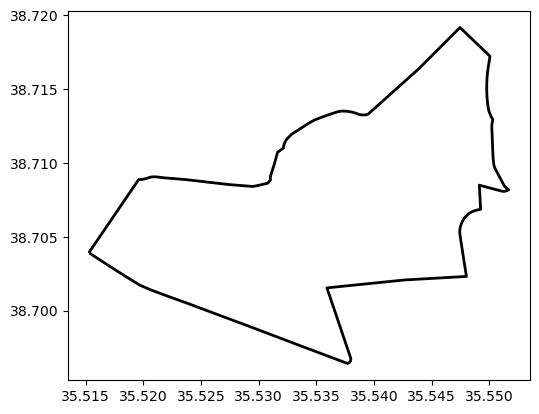

In [7]:
place = "Erciyes Universitesi, Kayseri, Türkiye"
uni_boundary = ox.geocode_to_gdf(place)

# Boş alanları bulmak için sınırları çizgiye dönüştür
uni_boundary['geometry'] = uni_boundary['geometry'].boundary

# Sınırları çiz
fig, ax = plt.subplots()
uni_boundary.plot(ax=ax, linewidth=2, edgecolor='black', facecolor='none')
plt.show()

## Erciyes Universitesi Binalar

In [8]:
tags = {'building': True}
place_name = 'Erciyes Universitesi, Kayseri, Türkiye'

buildings = ox.features_from_place(place_name, tags=tags)
buildings.head()


building                           source  \
element_type osmid                                                     
node         2613374526  university                             bing   
way          254642917   university  Maxar Premium-Luftbilder (Beta)   
             254643086   university                             bing   
             254649971   university                             bing   
             254653739   university                             bing   

                                                                  geometry  \
element_type osmid                                                           
node         2613374526                          POINT (35.53729 38.71103)   
way          254642917   POLYGON ((35.53979 38.71077, 35.54001 38.71071...   
             254643086   POLYGON ((35.53906 38.71091, 35.53946 38.71081...   
             254649971   POLYGON ((35.53374 38.70747, 35.53417 38.70762...   
             254653739   POLYGON ((35.52201 38.70791, 35.52225 38.70778...   

                                                                     nodes  \
element_type osmid                                                           
node         2613374526                                                NaN   
way          254642917   [2604505912, 2604505913, 4156165060, 415616505...   
             254643086   [2604507552, 2604507553, 2604507554, 260450755...   
             254649971   [2604565930, 2604565933, 2604565935, 260456593...   
             254653739   [2604600140, 2604600139, 2604600137, 260460013...   

                                                            name addr:city  \
element_type osmid                                                           
node         2613374526                                      NaN       NaN   
way          254642917   Mustafa Çıkrıkçıoğlu Meslek Yüksekokulu       NaN   
             254643086            Güzel Sanatlar Fak.Heykel Böl.   Kayseri   
             254649971    Personel ve Öğrenci Merkez Yemekhanesi       NaN   
             254653739                                    Kosgeb       NaN   

                        addr:country leisure amenity healthcare  ... email  \
element_type osmid                                               ...         
node         2613374526          NaN     NaN     NaN        NaN  ...   NaN   
way          254642917           NaN     NaN     NaN        NaN  ...   NaN   
             254643086            TR     NaN     NaN        NaN  ...   NaN   
             254649971           NaN     NaN     NaN        NaN  ...   NaN   
             254653739           NaN     NaN     NaN        NaN  ...   NaN   

                        tourism website ways type description alt_name  \
element_type osmid                                                       
node         2613374526     NaN     NaN  NaN  NaN         NaN      NaN   
way          254642917      NaN     NaN  NaN  NaN         NaN      NaN   
             254643086      NaN     NaN  NaN  NaN         NaN      NaN   
             254649971      NaN     NaN  NaN  NaN         NaN      NaN   
             254653739      NaN     NaN  NaN  NaN         NaN      NaN   

                        religion emergency alt_name:en  
element_type osmid                                      
node         2613374526      NaN       NaN         NaN  
way          254642917       NaN       NaN         NaN  
             254643086       NaN       NaN         NaN  
             254649971       NaN       NaN         NaN  
             254653739       NaN       NaN         NaN  

[5 rows x 36 columns]

### Bina isimleri

In [9]:
building_names = buildings['name']
building_names.dropna(inplace=True)

for i, name in enumerate(building_names):
  print('Bina', i+1, ':', name)

Bina 1 : Mustafa Çıkrıkçıoğlu Meslek Yüksekokulu
Bina 2 : Güzel Sanatlar Fak.Heykel Böl.
Bina 3 : Personel ve Öğrenci Merkez Yemekhanesi
Bina 4 : Kosgeb
Bina 5 : Mobilya Atölyesi
Bina 6 : Öğrenci Yemekhanesi
Bina 7 : Fehmi Özilhan Sivil Havacılık Yüksekokulu
Bina 8 : İlahiyat Fakültesi
Bina 9 : İlahiyat Fakültesi Kantin-kafe
Bina 10 : İlahiyat Fakültesi
Bina 11 : İlahiyat Fakültesi
Bina 12 : Lojman
Bina 13 : Erciyes Üniversitesi Rektörlük
Bina 14 : Spor Salonu
Bina 15 : Spor Salonu
Bina 16 : Türkan-Tuncer Hasçalık Turizm İşletmeciliği ve Otelcilik Yüksekokulu
Bina 17 : Adalet Yüksekokulu ve Hukuk Fakültesi
Bina 18 : Eğitim Fakültesi
Bina 19 : UZAYBİMER
Bina 20 : Sürekli Eğitim Merkezi - Ersem
Bina 21 : Lojman
Bina 22 : Lojman
Bina 23 : Lojman
Bina 24 : Lojman
Bina 25 : Mustafa Kılıçer Eczacılık Fakültesi
Bina 26 : Lojman
Bina 27 : Lojman
Bina 28 : Süleyman Çetinsaya Iletişim Fakültesi
Bina 29 : Güzel Sanatlar fak.Müzik Böl.
Bina 30 : Öğrenci Kantini ve konferans salonu
Bina 31 : Betül 

<Axes: >

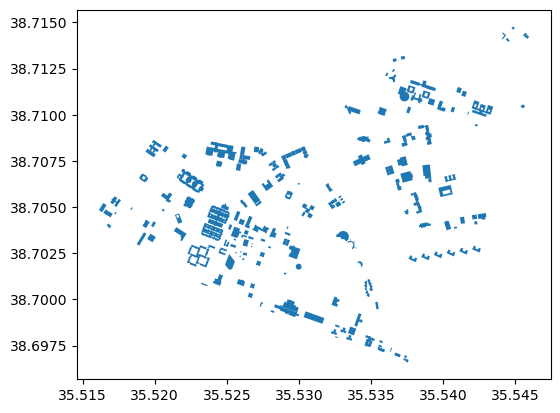

In [10]:
buildings.plot()

In [11]:
if not buildings.empty:
    # CRS'yi projeksiyonlu bir CRS'ye dönüştürme
    buildings_proj = buildings.to_crs("EPSG:3857")

    # Alan hesaplamasını projeksiyonlu geometri üzerinde yapma
    total_areas = buildings_proj.geometry.area.sum()

    print("Toplam Bina Alanı:", total_areas, "m²")

Toplam Bina Alanı: 411997.55832270824 m²


## Erciyes Universitesi Yollar

In [12]:
import osmnx as ox
place = "Erciyes Universitesi, Kayseri, Türkiye"
tags = {'highway': True}

# Geometrileri al
response_json = ox.features_from_place(place, tags=tags)

# Veriyi DataFrame olarak al
roads = ox.features_from_place(place, tags=tags)

roads.head()


highway                          name  \
element_type osmid                                                
node         7963544775  bus_stop  Sosyal Güvenlik Kurumu Önü 3   
             7963566825  bus_stop                   Lojmanlar 5   
             7963580398  bus_stop                   Kız Yurdu 1   
             7963587825  bus_stop             İlahiyat Girişi 9   
             7963592591  bus_stop       Şehit Komandolar Durağı   

                                                  source  \
element_type osmid                                         
node         7963544775  Maxar Premium-Luftbilder (Beta)   
             7963566825  Maxar Premium-Luftbilder (Beta)   
             7963580398  Maxar Premium-Luftbilder (Beta)   
             7963587825  Maxar Premium-Luftbilder (Beta)   
             7963592591  Maxar Premium-Luftbilder (Beta)   

                                          geometry alt_name  bus  \
element_type osmid                                                 
node         7963544775  POINT (35.53137 38.69835)      NaN  yes   
             7963566825  POINT (35.52758 38.69947)      NaN  yes   
             7963580398  POINT (35.53713 38.69665)      NaN  yes   
             7963587825  POINT (35.51792 38.70265)      NaN  yes   
             7963592591  POINT (35.52214 38.70104)      NaN  yes   

                                     network                       operator  \
element_type osmid                                                            
node         7963544775  Kayseri Ulaşım A.Ş.  Kayseri Büyükşehir Belediyesi   
             7963566825  Kayseri Ulaşım A.Ş.  Kayseri Büyükşehir Belediyesi   
             7963580398  Kayseri Ulaşım A.Ş.  Kayseri Büyükşehir Belediyesi   
             7963587825  Kayseri Ulaşım A.Ş.  Kayseri Büyükşehir Belediyesi   
             7963592591  Kayseri Ulaşım A.Ş.  Kayseri Büyükşehir Belediyesi   

                        public_transport   ref  ... bridge layer tunnel  \
element_type osmid                              ...                       
node         7963544775         platform  1464  ...    NaN   NaN    NaN   
             7963566825         platform  1244  ...    NaN   NaN    NaN   
             7963580398         platform  1587  ...    NaN   NaN    NaN   
             7963587825         platform   806  ...    NaN   NaN    NaN   
             7963592591         platform  1007  ...    NaN   NaN    NaN   

                        junction lane_markings handrail footway ramp  \
element_type osmid                                                     
node         7963544775      NaN           NaN      NaN     NaN  NaN   
             7963566825      NaN           NaN      NaN     NaN  NaN   
             7963580398      NaN           NaN      NaN     NaN  NaN   
             7963587825      NaN           NaN      NaN     NaN  NaN   
             7963592591      NaN           NaN      NaN     NaN  NaN   

                        ramp:wheelchair tactile_paving  
element_type osmid                                      
node         7963544775             NaN            NaN  
             7963566825             NaN            NaN  
             7963580398             NaN            NaN  
             7963587825             NaN            NaN  
             7963592591             NaN            NaN  

[5 rows x 28 columns]

<Axes: >

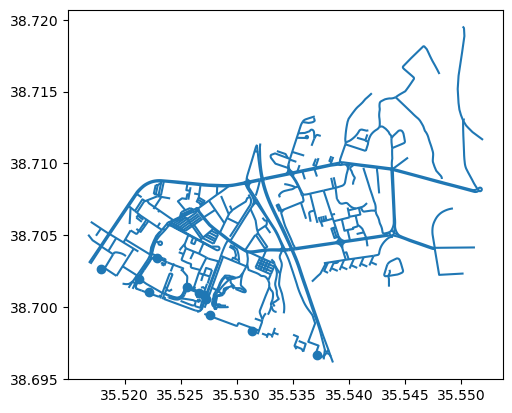

In [13]:
roads.plot()

In [14]:
# CRS'yi belirtin
roads.crs = "EPSG:4326"

if not roads.empty:
    # CRS'yi projeksiyonlu bir CRS'ye dönüştürme
    roads_proj = roads.to_crs("EPSG:3857")

    # Uzunluk hesaplamasını projeksiyonlu geometri üzerinde yapma
    total_length = roads_proj.geometry.length.sum()

    print("Toplam Yol Uzunluğu:", total_length, "metre")


Toplam Yol Uzunluğu: 82956.83388606689 metre


## OTOPARKLAR

In [15]:
# Yer adını ve etiketleri belirtin
place = "Erciyes Universitesi, Kayseri, Türkiye"
tags = {"amenity": "parking"}

# Overpass API'ye sorgu gönderin
response_json = ox.features_from_place(place, tags=tags)

# GeoDataFrame'i oluşturun
parking = gpd.GeoDataFrame.from_features(response_json)

parking.head()


,geometry,nodes,amenity,source,name,access,parking,fee,capacity:disabled,surface,ways,type
0,"POLYGON ((35.53821 38.71009, 35.53860 38.70999...","[2613313692, 2613313684, 2613313757, 261331378...",parking,bing,None,None,None,None,None,None,None,None
1,"POLYGON ((35.53679 38.70981, 35.53724 38.70969...","[2613313680, 2613313679, 2613313703, 261331374...",parking,bing,None,None,None,None,None,None,None,None
2,"POLYGON ((35.53872 38.70469, 35.53910 38.70479...","[2613374129, 2613374147, 2613374218, 261337421...",parking,bing,None,None,None,None,None,None,None,None
3,"POLYGON ((35.53917 38.70914, 35.53933 38.70916...","[2613412099, 2613412115, 2613412181, 261341218...",parking,bing,None,None,None,None,None,None,None,None
4,"POLYGON ((35.53857 38.70835, 35.53894 38.70841...","[2613412075, 2613412081, 2613412091, 261341209...",parking,bing,None,None,None,None,None,None,None,None


<Axes: >

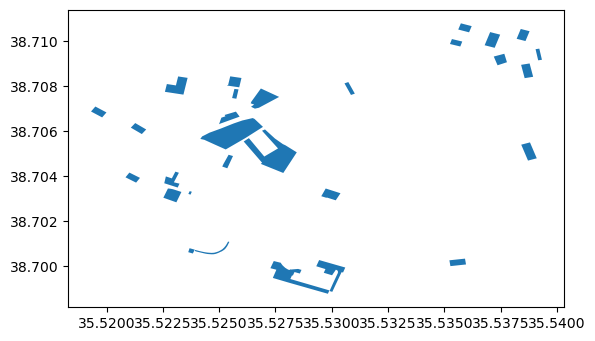

In [16]:
parking.plot()

### Otopark Sayısı

In [17]:
place = "Erciyes Universitesi, Kayseri, Türkiye"
tags = {"amenity": "parking"}
parking = ox.features_from_place(place, tags)

parking_count = len(parking)

print("Otopark Sayısı:", parking_count)


Otopark Sayısı: 29


In [18]:

# CRS'yi belirtin
parking.crs = "EPSG:4326"

if not parking.empty:
    # CRS'yi projeksiyonlu bir CRS'ye dönüştürme
    parking_proj = parking.to_crs("EPSG:3857")

    # Alan hesaplamasını projeksiyonlu geometri üzerinde yapma
    parking_proj["area"] = parking_proj.geometry.area
    total_parking_area = parking_proj["area"].sum()

    print("Toplam Park Alanı:", total_parking_area, "m²")


Toplam Park Alanı: 155327.59263737453 m²


## Erciyes Üniversitesi Yeşil Alanlar

Yeşil Alan hesabı ağaçlık bölgeler,çayır diye adlandırılan bodur ağaçların olduğu bölgeler ve park alanları dikkate alınarak yapıldı.


In [19]:
place = "Erciyes Universitesi, Kayseri, Türkiye"
tags = {"landuse": ["scrub", "meadow"], "leisure": "park"}

# Overpass API'ye sorgu gönder
response_json = ox.features_from_place(place, tags=tags)

# GeoDataFrame'i oluştur
green_areas = gpd.GeoDataFrame.from_features(response_json)
green_areas.head()



,geometry,nodes,addr:city,addr:country,landuse,natural,source,leisure,ways,type
0,"POLYGON ((35.53699 38.70567, 35.53753 38.70581...","[2613374222, 2613374225, 2613374183, 261337417...",Kayseri,TR,meadow,grass,bing,None,None,None
1,"POLYGON ((35.53713 38.70486, 35.53733 38.70491...","[2613374159, 2613374176, 2613374155, 261331353...",Kayseri,TR,meadow,grass,bing,None,None,None
2,"POLYGON ((35.53809 38.70499, 35.53811 38.70500...","[2613374187, 2613374189, 2613374188, 261337418...",Kayseri,TR,meadow,grass,bing,None,None,None
3,"POLYGON ((35.53810 38.70470, 35.53813 38.70472...","[6198992943, 2613313525, 2613313523, 261331352...",Kayseri,TR,meadow,grass,bing,None,None,None
4,"POLYGON ((35.53818 38.70453, 35.53871 38.70466...","[2613374112, 2613374124, 2613374106, 261337410...",Kayseri,TR,meadow,grass,bing,None,None,None


<Axes: >

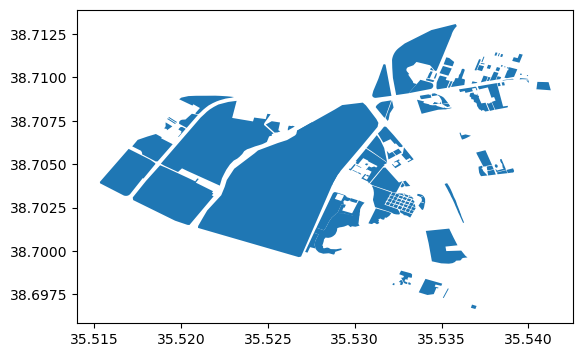

In [20]:
green_areas.plot()

In [21]:
green_areas.crs = "EPSG:4326"
if not green_areas.empty:
    # CRS'yi projeksiyonlu bir CRS'ye dönüştürme
    green_areas_proj = green_areas.to_crs("EPSG:3857")

    # Alan hesaplamasını projeksiyonlu geometri üzerinde yapma
    total_area = green_areas_proj.geometry.area.sum()

    print("Yeşil Alan:", total_area, "m²")

Yeşil Alan: 1767619.9629650647 m²


## Sulak Alan

In [22]:
place = "Erciyes Universitesi, Kayseri, Türkiye"
tags = {"natural": "water"}

# Overpass API'ye sorgu gönder
response_json = ox.features_from_place(place, tags=tags)

# GeoDataFrame'i oluştur
water_areas = gpd.GeoDataFrame.from_features(response_json)
water_areas.head()


,geometry,nodes,addr:city,addr:country,intermittent,natural,salt,source,water
0,"POLYGON ((35.52977 38.70127, 35.52956 38.70144...","[2614515754, 2614515769, 2614515768, 261451576...",Kayseri,TR,no,water,no,bing,pond


<Axes: >

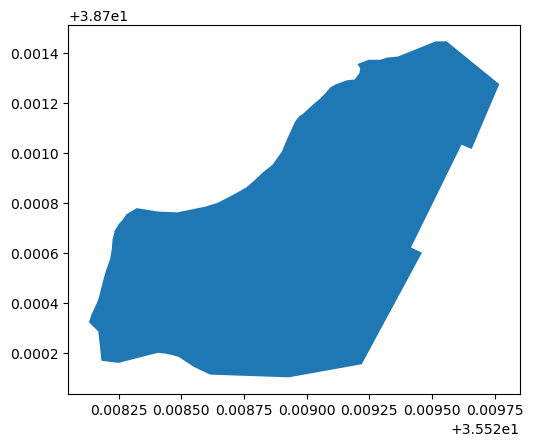

In [23]:
water_areas.plot()

In [24]:
water_areas.crs = "EPSG:4326"
if not water_areas.empty:
    # CRS'yi projeksiyonlu bir CRS'ye dönüştürme
    water_areas_proj = water_areas.to_crs("EPSG:3857")

    # Alan hesaplamasını projeksiyonlu geometri üzerinde yapma
    total_area = water_areas_proj.geometry.area.sum()

    print("Sulak Alan:", total_area, "metrekare")

Sulak Alan: 18697.919726802327 metrekare


# Erciyes Üniversitesi Boş Araziler

Boş araziler Erciyes Üniversitesi alanından binalar, yollar, otoparklar, yeşil alanlar ve sulak alanlar çıkarıldıktan sonra kalan araziler.

In [25]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

place_name = "Erciyes Universitesi, Kayseri, Türkiye"
area = ox.geocode_to_gdf(place_name)

buildings = ox.features_from_place(place_name, tags={'building': True})
roads = ox.features_from_place(place_name, tags={'highway': True})
parking = ox.features_from_place(place_name, tags={'amenity': 'parking'})
green_areas = ox.features_from_place(place_name, tags={"landuse": ["scrub", "meadow"], "leisure": "park"})
water_areas = ox.features_from_place(place_name, tags={'natural': 'water'})

# Kullanılabilir alanı hesapla
usable_area = area.geometry.iloc[0]
for geom in [buildings, parking, green_areas, water_areas,roads]:
    if len(geom) > 0:
        usable_area = usable_area.difference(gpd.GeoSeries(geom.unary_union))

# GeoDataFrame olarak usable_area oluştur
usable_area_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(usable_area))
usable_area_gdf.head()

,geometry
0,"MULTIPOLYGON (((35.52230 38.70093, 35.52116 38..."


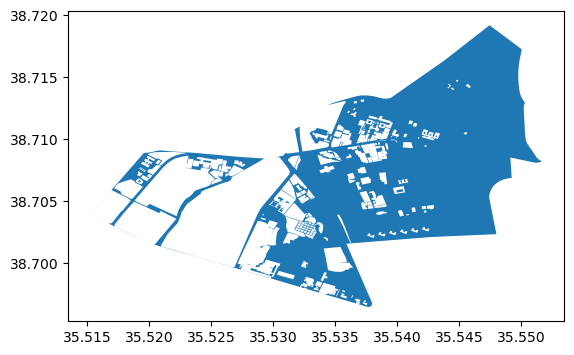

Boş Arazi: 3865690.1082872604 m²


In [26]:

# Kullanılabilir alanı çizdir
usable_area_gdf.plot()
plt.show()

usable_area_gdf.crs = "EPSG:4326"
if not usable_area_gdf.empty:
    # CRS'yi projeksiyonlu bir CRS'ye dönüştürme
    usable_area_proj = usable_area_gdf.to_crs("EPSG:3857")

    # Alan hesaplamasını projeksiyonlu geometri üzerinde yapma
    total_area = usable_area_proj.geometry.area.sum()

    print("Boş Arazi:", total_area, "m²")

#  Birleştirmiş Harita

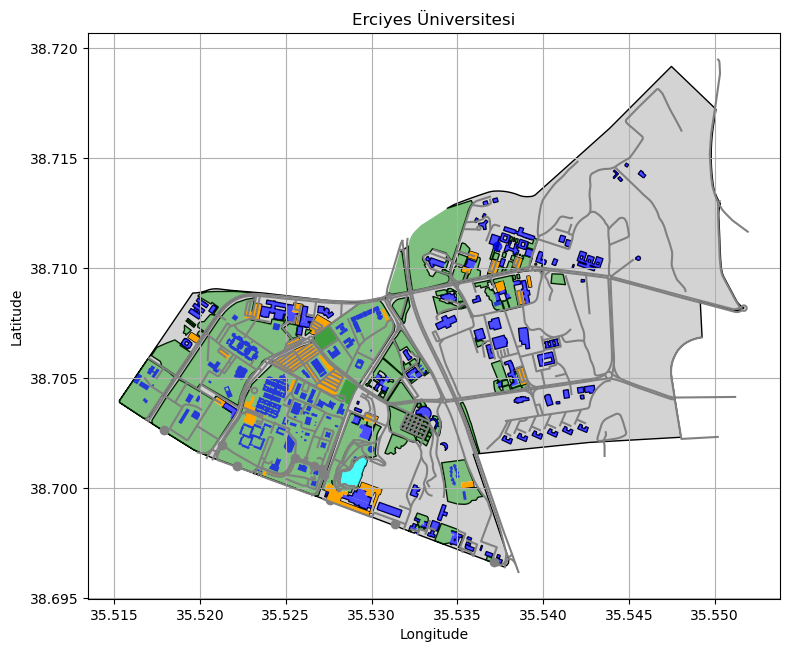

Kullanılabilir Arazi (m²) = 3865690.1082872604
Yeşil Alanlar (m²) = 1767619.9629650647
Sulak Alanlar (m²) = 18697.919726802327
Binalar Alanları (m²) = 411997.55832270824
Otopark Alanları (m²) = 155327.59263737453
Toplam Alan (m²) = 6219333.14193921


In [32]:
buildings = ox.features_from_place(place_name, tags={'building': True})
roads = ox.features_from_place(place_name, tags={'highway': True})
parking = ox.features_from_place(place_name, tags={'amenity': 'parking'})
green_areas = ox.features_from_place(place_name, tags={"landuse": ["scrub", "meadow"], "leisure": "park"})
water_areas = ox.features_from_place(place_name, tags={'natural': 'water'})

usable_area = area.geometry.iloc[0]

# Kullanılabilir Arazi
usable_area = area.geometry.iloc[0]
for geom in [buildings, parking, green_areas, water_areas,roads]:
    if len(geom) > 0:
        usable_area = usable_area.difference(gpd.GeoSeries(geom.unary_union))

# GeoDataFrame olarak usable_area oluştur
usable_area_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(usable_area))

# Haritayı çiz
fig, ax = plt.subplots(figsize=(8, 8))

usable_area_gdf.plot(ax=ax, color='lightgray', edgecolor='black')
green_areas.plot(ax=ax, color='green', alpha=0.5)
water_areas.plot(ax=ax, color='cyan', alpha=0.7)
buildings.plot(ax=ax, color='blue', alpha=0.7)
roads.plot(ax=ax, color='gray')
parking.plot(ax=ax, color='orange')


plt.title('Erciyes Üniversitesi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# CRS'yi belirle
usable_area_gdf.crs = "EPSG:4326"

# Kullanılabilir Arazi projeksiyonlu bir CRS'ye dönüştür
usable_area_proj = usable_area_gdf.to_crs("EPSG:3857")
usable_area_area = usable_area_proj.geometry.area.sum()

# Yeşil Alanları projeksiyonlu bir CRS'ye dönüştür
green_areas_proj = green_areas.to_crs("EPSG:3857")
green_areas_area = green_areas_proj.geometry.area.sum()

# Su Alanlarını projeksiyonlu bir CRS'ye dönüştür
water_areas_proj = water_areas.to_crs("EPSG:3857")
water_areas_area = water_areas_proj.geometry.area.sum()

# Binaları projeksiyonlu bir CRS'ye dönüştür
buildings_proj = buildings.to_crs("EPSG:3857")
buildings_area = buildings_proj.geometry.area.sum()

# Otoparkları projeksiyonlu bir CRS'ye dönüştür
parking_proj = parking.to_crs("EPSG:3857")
parking_area = parking_proj.geometry.area.sum()

# Toplam alanı hesapla
total_area = usable_area_area + green_areas_area + water_areas_area + buildings_area + parking_area

print("Kullanılabilir Arazi (m²) =", usable_area_area)
print("Yeşil Alanlar (m²) =", green_areas_area)
print("Sulak Alanlar (m²) =", water_areas_area)
print("Binalar Alanları (m²) =", buildings_area)
print("Otopark Alanları (m²) =", parking_area)
print("Toplam Alan (m²) =", total_area)


## Kullanıma Uygun Alanların Birleştirildiği Harita

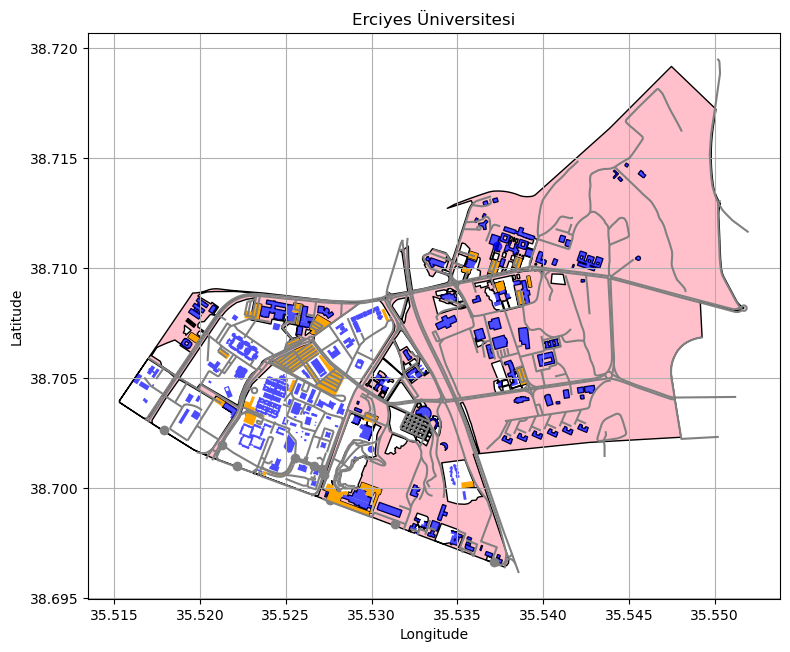

Kullanılabilir Arazi (m²) = 3865690.1082872604
Bina Alanları (m²) = 411997.55832270824
Otopark Alanları (m²) = 155327.59263737453
Toplam  (m²) = 4433015.259247344


In [33]:
buildings = ox.features_from_place(place_name, tags={'building': True})
roads = ox.features_from_place(place_name, tags={'highway': True})
parking = ox.features_from_place(place_name, tags={'amenity': 'parking'})

usable_area = area.geometry.iloc[0]

# Kullanılabilir Arazi
usable_area = area.geometry.iloc[0]
for geom in [buildings, parking, green_areas, water_areas,roads]:
    if len(geom) > 0:
        usable_area = usable_area.difference(gpd.GeoSeries(geom.unary_union))

# GeoDataFrame olarak usable_area 
usable_area_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(usable_area))

# Harita çiz
fig, ax = plt.subplots(figsize=(8, 8))

usable_area_gdf.plot(ax=ax, color='pink', edgecolor='black')
buildings.plot(ax=ax, color='blue', alpha=0.7)
roads.plot(ax=ax, color='gray')
parking.plot(ax=ax, color='orange')


plt.title('Erciyes Üniversitesi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# CRS'yi belirle
usable_area_gdf.crs = "EPSG:4326"

# Kullanılabilir alanı projeksiyonlu bir CRS'ye dönüştür
usable_area_proj = usable_area_gdf.to_crs("EPSG:3857")
usable_area_area = usable_area_proj.geometry.area.sum()

# Binaları projeksiyonlu bir CRS'ye dönüştür
buildings_proj = buildings.to_crs("EPSG:3857")
buildings_area = buildings_proj.geometry.area.sum()

# Otoparkları projeksiyonlu bir CRS'ye dönüştür
parking_proj = parking.to_crs("EPSG:3857")
parking_area = parking_proj.geometry.area.sum()

# Toplam alanı hesapla
total_area = usable_area_area + buildings_area + parking_area

print("Kullanılabilir Arazi (m²) =", usable_area_area)
print("Bina Alanları (m²) =", buildings_area)
print("Otopark Alanları (m²) =", parking_area)
print("Toplam  (m²) =", total_area)
